In [1]:
import pandas as pd
import numpy as np
import re, os, math, copy

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
print(tf.__version__)

import matplotlib.pyplot as plt
%matplotlib inline


2.6.0


In [2]:
df_pca = pd.read_csv('trimmomatic_pca.csv')
# print(df_pca.head())
feature_cols_pcs = [str(i) for i in range(0,12)]
label_pca='walltime'
X_pca = df_pca[feature_cols_pcs] # Features
y_pca = df_pca[label_pca] # Target variable

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.3, random_state=1) 

linear_regress_pca = LinearRegression()
linear_regress_pca.fit(X_train_pca,y_train_pca)
y_pred_pca = linear_regress_pca.predict(X_test_pca)

res_val_pca = []
for p, a in zip(y_pred_pca, y_test_pca):
    res_val_pca.append([p, a])
res_pca = pd.DataFrame(res_val_pca, columns=["predic", "actual"])
print(res_pca.head())
print("Mean Squared Error:", mean_squared_error(y_test_pca, y_pred_pca))
print("Mean Absolute Error:", mean_absolute_error(y_test_pca, y_pred_pca))



      predic     actual
0  13.193506  14.890702
1  12.207495  12.623110
2  13.483400  11.862430
3   2.264081   3.029203
4  13.731501  17.427629
Mean Squared Error: 3.9527573777605998
Mean Absolute Error: 1.3447297560339933


In [3]:
# X_train_pca, X_test_pca, y_train_pca, y_test_pca
# NN Model with one dimention
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(128, input_dim=X_train_pca.shape[1], activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
# model.add(tf.keras.layers.Dense(32, activation='relu'))
# model.add(tf.keras.layers.Dense(16, activation='relu'))
# model.add(tf.keras.layers.Dense(4, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='linear'))
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='mse', optimizer=opt, metrics=['mse', 'mae'])
history = model.fit(X_train_pca, y_train_pca, epochs=300, validation_split=0.2, batch_size=20)


Epoch 1/300
63/63 [==============================] - 1s 3ms/step - loss: 26.5606 - mse: 26.5606 - mae: 2.9231 - val_loss: 14.9497 - val_mse: 14.9497 - val_mae: 2.3593
Epoch 2/300
63/63 [==============================] - 0s 1ms/step - loss: 7.6646 - mse: 7.6646 - mae: 1.7251 - val_loss: 5.9244 - val_mse: 5.9244 - val_mae: 1.4817
Epoch 3/300
63/63 [==============================] - 0s 1ms/step - loss: 6.9768 - mse: 6.9768 - mae: 1.6055 - val_loss: 10.1690 - val_mse: 10.1690 - val_mae: 1.8098
Epoch 4/300
63/63 [==============================] - 0s 1ms/step - loss: 6.0328 - mse: 6.0328 - mae: 1.4446 - val_loss: 6.8431 - val_mse: 6.8431 - val_mae: 1.6257
Epoch 5/300
63/63 [==============================] - 0s 1ms/step - loss: 7.0131 - mse: 7.0131 - mae: 1.6615 - val_loss: 11.0412 - val_mse: 11.0412 - val_mae: 1.7164
Epoch 6/300
63/63 [==============================] - 0s 1ms/step - loss: 5.3879 - mse: 5.3879 - mae: 1.3306 - val_loss: 4.4471 - val_mse: 4.4471 - val_mae: 1.1575
Epoch 7/300
63

Epoch 51/300
63/63 [==============================] - 0s 1ms/step - loss: 4.3654 - mse: 4.3654 - mae: 1.0581 - val_loss: 8.4792 - val_mse: 8.4792 - val_mae: 1.7066
Epoch 52/300
63/63 [==============================] - 0s 1ms/step - loss: 3.7467 - mse: 3.7467 - mae: 1.0054 - val_loss: 6.2070 - val_mse: 6.2070 - val_mae: 1.2969
Epoch 53/300
63/63 [==============================] - 0s 1ms/step - loss: 3.4927 - mse: 3.4927 - mae: 0.9804 - val_loss: 5.4504 - val_mse: 5.4504 - val_mae: 1.2443
Epoch 54/300
63/63 [==============================] - 0s 1ms/step - loss: 3.9201 - mse: 3.9201 - mae: 0.9906 - val_loss: 4.9852 - val_mse: 4.9852 - val_mae: 1.1328
Epoch 55/300
63/63 [==============================] - 0s 1ms/step - loss: 4.1435 - mse: 4.1435 - mae: 1.0403 - val_loss: 13.0350 - val_mse: 13.0350 - val_mae: 1.6384
Epoch 56/300
63/63 [==============================] - 0s 1ms/step - loss: 4.3027 - mse: 4.3027 - mae: 1.0486 - val_loss: 6.1556 - val_mse: 6.1556 - val_mae: 1.2246
Epoch 57/300
6

Epoch 101/300
63/63 [==============================] - 0s 1ms/step - loss: 2.8442 - mse: 2.8442 - mae: 0.8742 - val_loss: 5.6439 - val_mse: 5.6439 - val_mae: 1.2133
Epoch 102/300
63/63 [==============================] - 0s 1ms/step - loss: 3.7540 - mse: 3.7540 - mae: 0.9393 - val_loss: 5.4195 - val_mse: 5.4195 - val_mae: 1.1405
Epoch 103/300
63/63 [==============================] - 0s 1ms/step - loss: 2.6163 - mse: 2.6163 - mae: 0.8516 - val_loss: 7.7473 - val_mse: 7.7473 - val_mae: 1.4040
Epoch 104/300
63/63 [==============================] - 0s 1ms/step - loss: 2.5895 - mse: 2.5895 - mae: 0.8521 - val_loss: 7.2632 - val_mse: 7.2632 - val_mae: 1.3685
Epoch 105/300
63/63 [==============================] - 0s 1ms/step - loss: 2.9306 - mse: 2.9306 - mae: 0.8798 - val_loss: 7.2315 - val_mse: 7.2315 - val_mae: 1.3054
Epoch 106/300
63/63 [==============================] - 0s 1ms/step - loss: 3.0640 - mse: 3.0640 - mae: 0.8984 - val_loss: 5.7612 - val_mse: 5.7612 - val_mae: 1.2570
Epoch 107/

63/63 [==============================] - 0s 1ms/step - loss: 2.3424 - mse: 2.3424 - mae: 0.7870 - val_loss: 6.5175 - val_mse: 6.5175 - val_mae: 1.2649
Epoch 151/300
63/63 [==============================] - 0s 1ms/step - loss: 2.1663 - mse: 2.1663 - mae: 0.7585 - val_loss: 6.1615 - val_mse: 6.1615 - val_mae: 1.2708
Epoch 152/300
63/63 [==============================] - 0s 1ms/step - loss: 2.5405 - mse: 2.5405 - mae: 0.7464 - val_loss: 6.8287 - val_mse: 6.8287 - val_mae: 1.2820
Epoch 153/300
63/63 [==============================] - 0s 1ms/step - loss: 2.2640 - mse: 2.2640 - mae: 0.7787 - val_loss: 8.3893 - val_mse: 8.3893 - val_mae: 1.3661
Epoch 154/300
63/63 [==============================] - 0s 1ms/step - loss: 1.9771 - mse: 1.9771 - mae: 0.6887 - val_loss: 5.5388 - val_mse: 5.5388 - val_mae: 1.1664
Epoch 155/300
63/63 [==============================] - 0s 1ms/step - loss: 2.3302 - mse: 2.3302 - mae: 0.7911 - val_loss: 6.2287 - val_mse: 6.2287 - val_mae: 1.2076
Epoch 156/300
63/63 [===

Epoch 200/300
63/63 [==============================] - 0s 1ms/step - loss: 2.4841 - mse: 2.4841 - mae: 0.7887 - val_loss: 5.8467 - val_mse: 5.8467 - val_mae: 1.2159
Epoch 201/300
63/63 [==============================] - 0s 1ms/step - loss: 1.8963 - mse: 1.8963 - mae: 0.6442 - val_loss: 5.8530 - val_mse: 5.8530 - val_mae: 1.2401
Epoch 202/300
63/63 [==============================] - 0s 1ms/step - loss: 1.6529 - mse: 1.6529 - mae: 0.6545 - val_loss: 5.8209 - val_mse: 5.8209 - val_mae: 1.1942
Epoch 203/300
63/63 [==============================] - 0s 1ms/step - loss: 1.6758 - mse: 1.6758 - mae: 0.6040 - val_loss: 9.0297 - val_mse: 9.0297 - val_mae: 1.5029
Epoch 204/300
63/63 [==============================] - 0s 1ms/step - loss: 1.8584 - mse: 1.8584 - mae: 0.6581 - val_loss: 6.7217 - val_mse: 6.7217 - val_mae: 1.3319
Epoch 205/300
63/63 [==============================] - 0s 1ms/step - loss: 2.1607 - mse: 2.1607 - mae: 0.7011 - val_loss: 6.6050 - val_mse: 6.6050 - val_mae: 1.3036
Epoch 206/

Epoch 250/300
63/63 [==============================] - 0s 1ms/step - loss: 1.6668 - mse: 1.6668 - mae: 0.6035 - val_loss: 5.7904 - val_mse: 5.7904 - val_mae: 1.2677
Epoch 251/300
63/63 [==============================] - 0s 1ms/step - loss: 2.0026 - mse: 2.0026 - mae: 0.6251 - val_loss: 4.9065 - val_mse: 4.9065 - val_mae: 1.1358
Epoch 252/300
63/63 [==============================] - 0s 1ms/step - loss: 1.5079 - mse: 1.5079 - mae: 0.6179 - val_loss: 5.7783 - val_mse: 5.7783 - val_mae: 1.2413
Epoch 253/300
63/63 [==============================] - 0s 1ms/step - loss: 1.3650 - mse: 1.3650 - mae: 0.6045 - val_loss: 5.9233 - val_mse: 5.9233 - val_mae: 1.2308
Epoch 254/300
63/63 [==============================] - 0s 1ms/step - loss: 1.6976 - mse: 1.6976 - mae: 0.6445 - val_loss: 5.5895 - val_mse: 5.5895 - val_mae: 1.2257
Epoch 255/300
63/63 [==============================] - 0s 1ms/step - loss: 1.6506 - mse: 1.6506 - mae: 0.6164 - val_loss: 5.5762 - val_mse: 5.5762 - val_mae: 1.2213
Epoch 256/

Epoch 300/300
63/63 [==============================] - 0s 1ms/step - loss: 1.5485 - mse: 1.5485 - mae: 0.5535 - val_loss: 6.2329 - val_mse: 6.2329 - val_mae: 1.3352


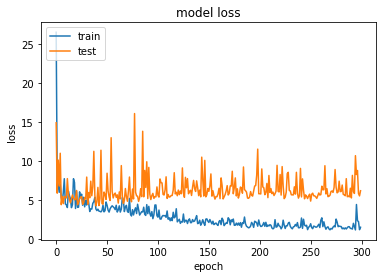

34/34 [==============================] - 0s 524us/step - loss: 5.2601 - mse: 5.2601 - mae: 1.3012
      predic     actual
0  12.592589  14.890702
1  14.878147  12.623110
2  20.118233  11.862430
3   3.160901   3.029203
4  12.447677  17.427629
Mean Squared Error: 5.260091571862474
Mean Absolute Error: 1.301239153104169


In [4]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

model.evaluate(X_train_pca, y_train_pca, batch_size=20)
model.evaluate(X_test_pca, y_test_pca, batch_size=20)

y_pred_pca_2 = model.predict(X_test_pca).flatten()
testy_np = y_test_pca.to_numpy()
res_val_pca_2 = []
for p, a in zip(y_pred_pca_2, testy_np):
    res_val_pca_2.append([p, a])
res_pca_2 = pd.DataFrame(res_val_pca_2, columns=["predic", "actual"])
print(res_pca_2.head())

print("Mean Squared Error:", mean_squared_error(y_test_pca, y_pred_pca_2))
print("Mean Absolute Error:", mean_absolute_error(y_test_pca, y_pred_pca_2))

In [5]:
# X_train_pca, X_test_pca, y_train_pca, y_test_pca

# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X_train_pca, y_train_pca)

y_pred_pca_3 = regressor.predict(X_test_pca)

res_val_pca_3 = []
for p, a in zip(y_pred_pca_3, y_test_pca):
    res_val_pca_3.append([p, a])
res_val_pca_3 = pd.DataFrame(res_val_pca_3, columns=["predic", "actual"])
print(res_val_pca_3.head())
print("Mean Squared Error:", mean_squared_error(y_test_pca, y_pred_pca_3))
print("Mean Absolute Error:", mean_absolute_error(y_test_pca, y_pred_pca_3))



      predic     actual
0  12.265966  14.890702
1  13.514526  12.623110
2  19.245870  11.862430
3   2.882908   3.029203
4  18.798547  17.427629
Mean Squared Error: 6.943243278843148
Mean Absolute Error: 1.3783936899687563
